# Diviations plots

## Mean deviation plot:
Average line off

'plots/max deviations.png'

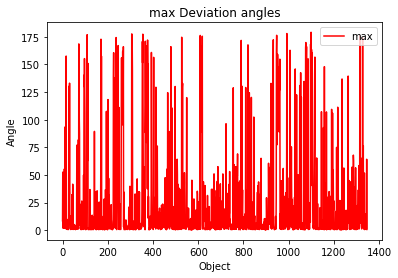

In [5]:
from plots_generation import Drawing_plots 
Drawing_plots("mean",average_line = False).drawing_plots()

## Max deviations plot:
Average line on

'plots/max deviations.png'

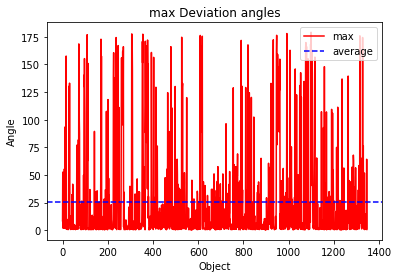

In [7]:
from plots_generation import Drawing_plots 
Drawing_plots("max",average_line = True).drawing_plots()

## Floor max deviations:
Average line on

'plots/floor_max deviations.png'

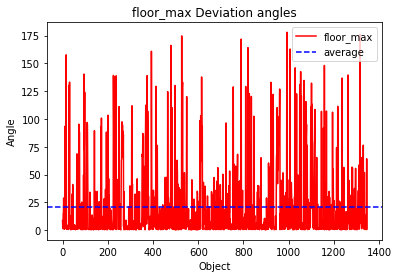

In [9]:
from plots_generation import Drawing_plots 
Drawing_plots("floor_max",average_line = True).drawing_plots()